# <center><u> LAB 1 - SJSU MOVIE DATA ANALYSIS</u></center>
    

<Center>Course: DATA 225 - DB SYSTEM FOR ANALYTICS</center>
<center>Submitted by : Gayathri Sundareshwar , Keerthana Gopikrishnan ,  Deepasha Jenamani</Center>
<center>25th Mar 2022</center>

## <Center> READ ME <CENTER>

Please read the following before proceeding with the execution.<br>

The connection details for the aws db used is:  <br>
&emsp;&emsp; <b>Host:</b>          lab-assignment-225.cibzfcia066j.us-east-1.rds.amazonaws.com<br>
&emsp;&emsp; <b>Port:</b>          3306<br>
&emsp;&emsp; <b>UserName:</b>      admin<br>
&emsp;&emsp; <b>Password:</b>      welcome123<br>

Some of the queries and commands below require dynamic input from the user. Please wait for the input pop up and enter valid data.<br>

NOTE:

Stored Procedure 2,3 and 4 (headings given below) requires dynamic input. Please provide as mentioned below samples:<br>

<b>Stored Procedure 2 : </b>Please input valid month number . example : 1,2,3, ... ,12<br>
<b>Stored Procedure 3 : </b>Please input valid year between 2006 and 2016. Since the given movie dataset has inputs for those years only.<br>
<b>Stored Procedure 4 : </b>Please input customer id (Example : 9000000001, 9000000002, ... , 9000001000 ) and next it will ask for choice between personal or invoice. provide either one as input.<br>

## <center>IMPORTING PACKAGES <center>

In [3]:
import mysql.connector
import pandas as pd
import numpy as np
import math
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from getpass import getpass
from time import time

start = time()

## <Center>AWS MYSQL DB CONNECTION<center>

### Enter the username and Password to connect to the AWS MYSQL DB:

In [4]:
print(" Connecting to the host 'lab-assignment-225.cibzfcia066j.us-east-1.rds.amazonaws.com' ")
global usrnm;
usrnm=input("Enter username to connect to the AWS MYSQL DB: ")
global pwd;
pwd=getpass("Enter password  to connect to the AWS MYSQL DB: ")

 Connecting to the host 'lab-assignment-225.cibzfcia066j.us-east-1.rds.amazonaws.com' 
Enter username to connect to the AWS MYSQL DB: admin
Enter password  to connect to the AWS MYSQL DB: ········


### Display the databases present in the connection:

In [5]:
from mysql.connector import connect, Error
try:
    with connect(
        host="lab-assignment-225.cibzfcia066j.us-east-1.rds.amazonaws.com",user=usrnm, password=pwd ) as connection:
        show_db_query = "SHOW DATABASES"
        with connection.cursor() as cursor:
            cursor.execute(show_db_query)
            for db in cursor:
                print(db)
except Error as e:
    print(e)

('information_schema',)
('mysql',)
('perf_measurement',)
('performance_schema',)
('sjsu_movie_db',)
('sys',)


### Describe Movie Data table:

In [6]:
from mysql.connector import connect, Error

try:
     with connect(host="lab-assignment-225.cibzfcia066j.us-east-1.rds.amazonaws.com",
                 user=usrnm,
                 password=pwd,
                 database="sjsu_movie_db"
    ) as connection:
        show_table_query = "DESCRIBE Movie_data"
        with connection.cursor() as cursor:
            cursor.execute(show_table_query)
            result = cursor.fetchall()
            for row in result:
                print(row)
except Error as e:
    print(e)

('Rank_ID', b'int', 'NO', 'PRI', None, 'auto_increment')
('Title', b'varchar(100)', 'YES', '', None, '')
('Description', b'varchar(300)', 'YES', '', None, '')
('Director', b'varchar(20)', 'YES', '', None, '')
('Year', b'int', 'YES', '', None, '')
('Runtime', b'int', 'YES', '', None, '')
('Rating', b'float', 'YES', '', None, '')
('Votes', b'bigint', 'YES', '', None, '')
('Revenue', b'float', 'YES', '', None, '')
('Metascore', b'int', 'YES', '', None, '')


## <center> SQL QUERIES EXECUTION </center>

### SQL QUERY 1:

#### Display the No of customers present in each country

In [7]:
from mysql.connector import connect, Error

try:
     with connect(host="lab-assignment-225.cibzfcia066j.us-east-1.rds.amazonaws.com",
                 user=usrnm,
                 password=pwd,
                 database="sjsu_movie_db"
    ) as connection:
        sql1 = "select cust_country,count(*) from customer_details group by cust_country order by count(*) desc;"
        with connection.cursor() as cur1:
            cur1.execute(sql1)
            country_wise_customer = pd. DataFrame (cur1. fetchall ())
except Error as e:
    print(e)

country_wise_customer.columns =['Country','Count'] 
country_wise_customer

,Country,Count
0,USA,502
1,United Kingdom,285
2,Canada,214


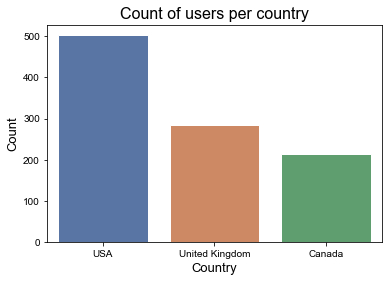

In [8]:
plt.title('Count of users per country', size=16,color='BLACK')
plt.xlabel('Country', size=13)
plt.ylabel('Count', size=13)
sns.set(rc = {'figure.figsize':(8,3)})
g = sns.barplot(x = 'Country', y = 'Count',data=country_wise_customer)

### SQL Query 2:

#### Display the No of Movies Released Based on Year

In [9]:
from mysql.connector import connect, Error

try:
    with connect(host="lab-assignment-225.cibzfcia066j.us-east-1.rds.amazonaws.com",
                 user=usrnm,
                 password=pwd,
                 database="sjsu_movie_db"
    ) as connection:
        sql2 = "select year,count(*) from Movie_data group by Year order by count(*) desc;;"
        with connection.cursor() as cur2:
            cur2.execute(sql2)
            Year_movie_count = pd. DataFrame (cur2. fetchall ())
except Error as e:
    print(e)

Year_movie_count.columns =['Release Year','Count of Movies Released'] 
Year_movie_count

,Release Year,Count of Movies Released
0,2016,297
1,2015,127
2,2014,98
3,2013,91
4,2012,64
5,2011,63
6,2010,60
7,2007,53
8,2008,52
9,2009,51


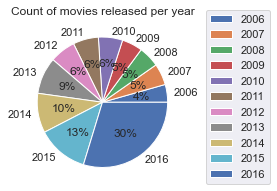

In [10]:
ax=Year_movie_count.groupby(['Release Year']).sum().plot(kind='pie', y='Count of Movies Released', autopct='%1.0f%%',
                                title='Count of movies released per year')
ax.set_axis_off()
ax = plt.gca()
ax=plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes)

### SQL Query 3:

#### Ranking the Top 5 Employees who has responded to the most complaints

In [11]:
from mysql.connector import connect, Error

try:
    with connect(host="lab-assignment-225.cibzfcia066j.us-east-1.rds.amazonaws.com",
                 user=usrnm,
                 password=pwd,
                 database="sjsu_movie_db"
    ) as connection:
        sql3 ="""\
            SELECT c.emp_id,CONCAT(e.emp_first_name,'',e.emp_middle_name,'',e.emp_last_name) AS 'Employee Name',
            COUNT(complaint_id)
            FROM cust_complaints c JOIN employees e USING(emp_id) GROUP BY c.emp_id ORDER BY
             count(complaint_id) DESC LIMIT 5;
            """
        with connection.cursor() as cur3:
            cur3.execute(sql3)
            top_5_employee = pd. DataFrame (cur3. fetchall ())
except Error as e:
    print(e)

    
top_5_employee.columns =['Employee ID','Employee Name','Total complaints resolved'] 
top_5_employee

,Employee ID,Employee Name,Total complaints resolved
0,512211915,Ndzi Samuel Colombui,13
1,521004885,Johnston Kylo Yen,10
2,291255019,Gilles Denisa S Alex,10
3,283386581,Gerke Alejandro Melisa,10
4,615036329,Veera Jane Abdellah,10


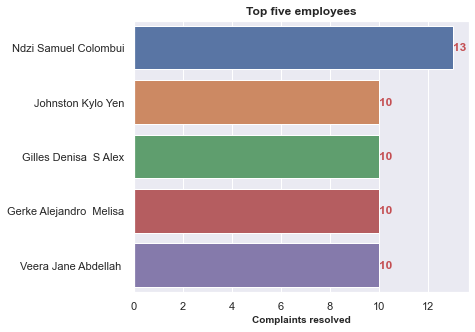

In [12]:
plt.figure(figsize=(6,5))
plot = sns.barplot(y='Employee Name',x = 'Total complaints resolved',data=top_5_employee)
plot.set_title('Top five employees',fontweight = 'bold',fontsize = 12)
plot.set_ylabel('')
plot.set_xlabel('Complaints resolved',fontweight = 'bold',fontsize = 10)
plot.bar_label(plot.containers[0],color='r',fontweight='bold')
plt.show()

### SQL Query 4:

Average time taken taken to close a ticket.

In [13]:
from mysql.connector import connect, Error

try:
    with connect(host="lab-assignment-225.cibzfcia066j.us-east-1.rds.amazonaws.com",
                 user=usrnm,
                 password=pwd,
                 database="sjsu_movie_db"
    ) as connection:
        sql4 = """select 
        sum(datediff(close_date,complaint_creation_date))/count(datediff(close_date,complaint_creation_date)) 
        as Avg_days_taken
        from cust_complaints where resolution_status='Closed' 
        order by datediff(close_date,complaint_creation_date) desc;"""
        with connection.cursor() as cur4:
            cur4.execute(sql4)
            avg_time=cur4. fetchone ()
            print("Average Time Taken:\t",avg_time[0]," DAYS.")
except Error as e:
    print(e)

Average Time Taken:	 3.3673  DAYS.


### SQL Query 5:

#### TOP 10 Most watched movies in USA UK and Canada

In [14]:
from mysql.connector import connect, Error

try:
    with connect(host="lab-assignment-225.cibzfcia066j.us-east-1.rds.amazonaws.com",
                 user=usrnm,
                 password=pwd,
                 database="sjsu_movie_db"
    ) as connection:
        sql5 = """select c.cust_country,m.title,count(u.rank_id) as times_watched from user_watch_history u 
        join Movie_data m on u.rank_id=m.rank_id join user_details ud on ud.user_id=u.user_id 
        join customer_details c on c.customer_id=ud.customer_id 
        group by c.cust_country,m.title order by cust_country,count(rank_id) desc;"""
        with connection.cursor() as cur5:
            cur5.execute(sql5)
            top_10_movies_country_wise = pd. DataFrame (cur5. fetchall ())
except Error as e:
    print(e)

In [15]:
top_10_movies_country_wise.columns =['Country','Title','Times Watched'] 
top_10_movies_country_wise.Country.unique()


array(['Canada', 'United Kingdom', 'USA'], dtype=object)

In [16]:
movie_array=top_10_movies_country_wise.to_numpy()
canada_array=[]
UK_array=[]
USA_array=[]
for i in movie_array:
    if i[0]=='Canada':
        canada_array.append(i)
    elif i[0]=='United Kingdom':
        UK_array.append(i)
    elif i[0]=='USA':
        USA_array.append(i)

Canada_df = pd.DataFrame (canada_array, columns= ['Country', 'title','Times Watched'])
UK_df = pd.DataFrame (UK_array, columns= ['Country', 'title','Times Watched'])
USA_df = pd.DataFrame (USA_array, columns= ['Country', 'title','Times Watched'])
    

In [17]:
sorted_USA = USA_df.sort_values(by='Times Watched', ascending=False)
sorted_UK = UK_df.sort_values(by='Times Watched', ascending=False)
sorted_Canada = Canada_df.sort_values(by='Times Watched', ascending=False)

In [18]:
USA_Top_10=sorted_USA.head(10)
UK_Top_10=sorted_UK.head(10)
Canada_Top_10=sorted_Canada.head(10)

In [19]:
uk_top_10_movies=[]
usa_top_10_movies=[]
canada_top_10_movies=[]
uk_top_10_movies=UK_Top_10['title'].to_numpy()
usa_top_10_movies=USA_Top_10['title'].to_numpy()
canada_top_10_movies=Canada_Top_10['title'].to_numpy()


In [20]:
top_10_movies=pd.DataFrame()
top_10_movies['USA']=usa_top_10_movies
top_10_movies['UK']=uk_top_10_movies
top_10_movies['Canada']=canada_top_10_movies
top_10_movies.head(10)

,USA,UK,Canada
0,The Host,Rio,This Beautiful Fantastic
1,The Visit,Total Recall,The Magnificent Seven
2,The Blackcoat's Daughter,Selma,Evil Dead
3,A Million Ways to Die in the West,Warcraft,Sleeping with Other People
4,Blackhat,Friend Request,Carrie
5,Guardians of the Galaxy,The Headhunter's Calling,Bridge of Spies
6,Red Dawn,The Ugly Truth,The Boss
7,Mindhorn,Now You See Me 2,Everest
8,Silver Linings Playbook,American Pastoral,The Skin I Live In
9,Oculus,Pompeii,The Happening


### SQL Query 6:

#### Display how many screens are used by customers on average

In [21]:
from mysql.connector import connect, Error

try:
    with connect(host="lab-assignment-225.cibzfcia066j.us-east-1.rds.amazonaws.com",
                 user=usrnm,
                 password=pwd,
                 database="sjsu_movie_db"
    ) as connection:
        sql6 = """select round(sum(no_of_screens)/count(no_of_screens)) as avg_screens from 
        (select customer_id,count(*) as 'no_of_screens' from user_details group by customer_id 
        order by customer_id asc) t1;"""
        with connection.cursor() as cur6:
            cur6.execute(sql6)
            avg_screens=cur6. fetchone ()
            print("Average No of Screens used by customers:\t",avg_screens[0]," Screens.")
except Error as e:
    print(e)

Average No of Screens used by customers:	 3  Screens.


### SQL Query 7:

#### Display the Total No of complaints recorded grouped by Complaint Category

In [22]:
from mysql.connector import connect, Error

try:
    with connect(host="lab-assignment-225.cibzfcia066j.us-east-1.rds.amazonaws.com",
                 user=usrnm,
                 password=pwd,
                 database="sjsu_movie_db"
    ) as connection:
        sql7 = """
        select complaint_category,count(*) as 'Number of Complaints'
        from cust_complaints 
        group by complaint_category 
        order by count(*) asc;"""
        with connection.cursor() as cur7:
            cur7.execute(sql7)
            count_complaint_category = pd. DataFrame (cur7. fetchall ())
except Error as e:
    print(e)

    
count_complaint_category.columns =['Complaint Category','No of Complaints recorded'] 
count_complaint_category

,Complaint Category,No of Complaints recorded
0,Account issue,48
1,Login issue,52
2,Video quality issue,59
3,Payment issue,62
4,Audio quality issue,79


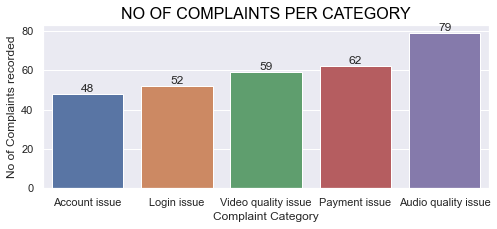

In [23]:
plt.title('NO OF COMPLAINTS PER CATEGORY', size=16,color='BLACK')
sns.set(rc = {'figure.figsize':(8,4)})
g = sns.barplot(x = 'Complaint Category', y = 'No of Complaints recorded',data=count_complaint_category)
ax=g.bar_label(g.containers[0])

### SQL Query 8:

#### Display the Total No of Complaints Closed Per Month

In [24]:
from mysql.connector import connect, Error

try:
    with connect(host="lab-assignment-225.cibzfcia066j.us-east-1.rds.amazonaws.com",
                 user=usrnm,
                 password=pwd,
                 database="sjsu_movie_db"
    ) as connection:
        sql8 = """select monthname(close_date) as closed_month,count(*) from cust_complaints 
        where resolution_status='Closed' group by month(close_date) order by month(close_date) asc;"""
        with connection.cursor() as cur8:
            cur8.execute(sql8)
            tickets_closed = pd. DataFrame (cur8. fetchall ())
except Error as e:
    print(e)
    
tickets_closed.columns =['Month','No of Complaints Closed'] 
tickets_closed

,Month,No of Complaints Closed
0,January,61
1,February,86


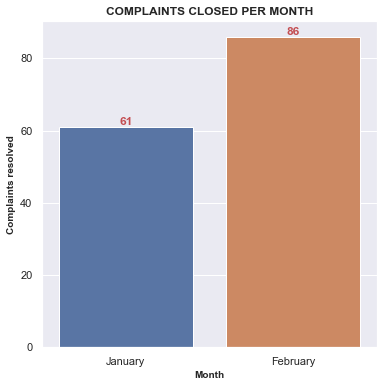

In [25]:
plt.figure(figsize=(6,6))
plot = sns.barplot(x='Month',y = 'No of Complaints Closed',data=tickets_closed)
plot.set_title('COMPLAINTS CLOSED PER MONTH',fontweight = 'bold',fontsize = 12)
plot.set_xlabel('Month',fontweight = 'bold',fontsize = 10)
plot.set_ylabel('Complaints resolved',fontweight = 'bold',fontsize = 10)
plot.bar_label(plot.containers[0],color='r',fontweight='bold')
plt.show()

### SQL Query 9:

#### Display the Total Payments Made Per Month

In [26]:
from mysql.connector import connect, Error

try:
    with connect(host="lab-assignment-225.cibzfcia066j.us-east-1.rds.amazonaws.com",
                 user=usrnm,
                 password=pwd,
                 database="sjsu_movie_db"
    ) as connection:
        sql9 = """SELECT DATE_FORMAT(payment_date, '%M, %y') AS payment_month, 
        sum(total_amount) AS payment_per_month FROM invoice_details 
        GROUP BY payment_month order by payment_month asc;"""
        with connection.cursor() as cur9:
            cur9.execute(sql9)
            month_amount = pd. DataFrame (cur9. fetchall ())
except Error as e:
    print(e)
    
month_amount.columns =['Payment Month','Amount'] 
month_amount['Amount']=pd.to_numeric(month_amount['Amount'])
month_amount

,Payment Month,Amount
0,"April, 21",1556.10
1,"August, 21",1576.05
2,"December, 21",1596.00
3,"February, 21",1416.45
4,"January, 21",1815.45
5,"July, 21",1835.40
6,"June, 21",1755.60
7,"March, 21",1895.25
8,"May, 21",1576.05
9,"November, 21",1615.95


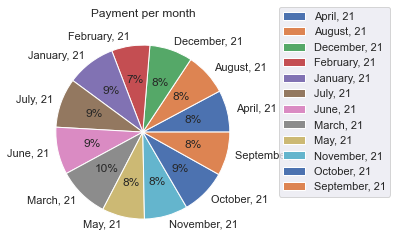

In [27]:
ax=month_amount.groupby(['Payment Month']).sum().plot(kind='pie', y='Amount', autopct='%1.0f%%',
                                title='Payment per month')
ax.set_axis_off()
ax = plt.gca()
ax=plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes)

### SQL Query 10:

#### Top 10 customers based on the number of movies watched

In [28]:
from mysql.connector import connect, Error

try:
    with connect(host="lab-assignment-225.cibzfcia066j.us-east-1.rds.amazonaws.com",
                 user=usrnm,
                 password=pwd,
                 database="sjsu_movie_db"
    ) as connection:
        sql10 = """select concat(c.cust_first_name,' ',c.cust_last_name) as customer_name ,
        count(*) as no_of_movies_watched from user_watch_history u 
        join user_details ud on u.user_id=ud.user_id 
        join customer_details c on c.customer_id=ud.customer_id 
        group by customer_name order by count(*) desc limit 10;"""
        with connection.cursor() as cur10:
            cur10.execute(sql10)
            top_10_cust = pd. DataFrame (cur10. fetchall ())
except Error as e:
    print(e)
    
top_10_cust.columns =['Customer Name','No of Movies Watched'] 
top_10_cust

,Customer Name,No of Movies Watched
0,Rodolfo Polidori,26
1,Adolph Hellickson,26
2,Tonja Sama,25
3,Santos Pelkowski,25
4,Jamal Bairo,24
5,Antonio Stoltzman,24
6,Elly Ferenz,24
7,Lynna Sweigard,23
8,Brock Mosseri,23
9,Carisa Toyama,23


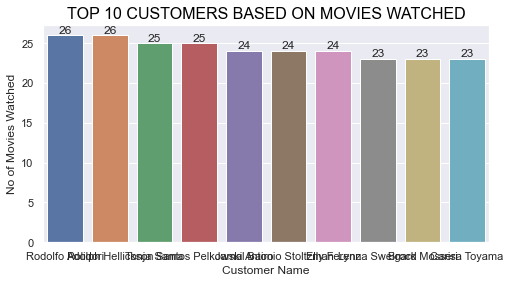

In [29]:
plt.title('TOP 10 CUSTOMERS BASED ON MOVIES WATCHED', size=16,color='BLACK')
sns.set(rc = {'figure.figsize':(20,5)})
g = sns.barplot(x = 'Customer Name', y = 'No of Movies Watched',data=top_10_cust)
ax=g.bar_label(g.containers[0])

### SQL Query 11:

#### Top 5 directors based on user watch history

In [30]:
from mysql.connector import connect, Error

try:
    with connect(host="lab-assignment-225.cibzfcia066j.us-east-1.rds.amazonaws.com",
                 user=usrnm,
                 password=pwd,
                 database="sjsu_movie_db"
    ) as connection:
        sql11 = """select m.director, count(*) from user_watch_history u join Movie_data m on m.rank_id=u.rank_id 
        group by u.rank_id,director order by count(*) desc limit 5; """
        with connection.cursor() as cur11:
            cur11.execute(sql11)
            top_5_directors = pd. DataFrame (cur11. fetchall ())
except Error as e:
    print(e)
    
top_5_directors.columns =['Director Name','Total Movies watched by customers'] 
top_5_directors

,Director Name,Total Movies watched by customers
0,Seth MacFarlane,18
1,Simon Aboud,17
2,Darren Aronofsky,17
3,M. Night Shyamalan,17
4,Steven Spielberg,16


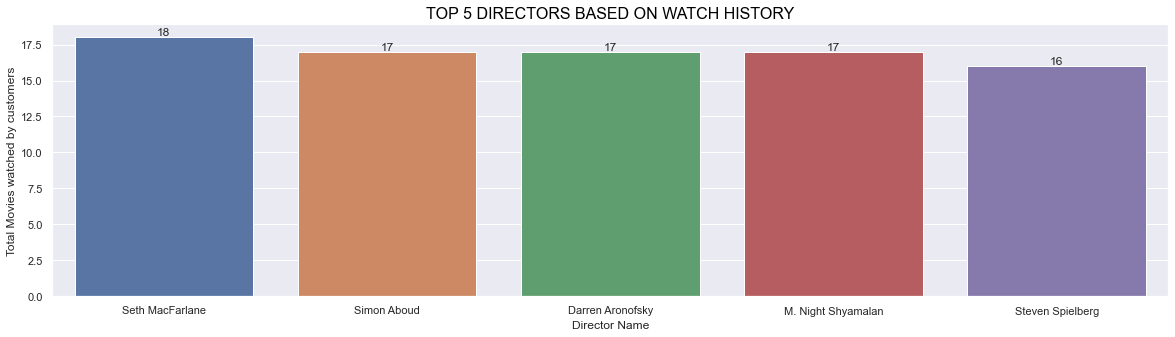

In [31]:
plt.title('TOP 5 DIRECTORS BASED ON WATCH HISTORY', size=16,color='BLACK')
sns.set(rc = {'figure.figsize':(20,5)})
g = sns.barplot(x = 'Director Name', y = 'Total Movies watched by customers',data=top_5_directors)
ax=g.bar_label(g.containers[0])

### SQL Query 12:

#### Total no of Complaints based on severity

In [32]:
from mysql.connector import connect, Error

try:
    with connect(host="lab-assignment-225.cibzfcia066j.us-east-1.rds.amazonaws.com",
                 user=usrnm,
                 password=pwd,
                 database="sjsu_movie_db"
    ) as connection:
        sql12 = "Select severity,count(*) as 'number of complaints' from cust_complaints group by severity; "
        with connection.cursor() as cur12:
            cur12.execute(sql12)
            count_severity = pd. DataFrame (cur12. fetchall ())
except Error as e:
    print(e)
    
count_severity.columns =['Severity level','No of complaints'] 
count_severity

,Severity level,No of complaints
0,Medium,92
1,Low,110
2,High,98


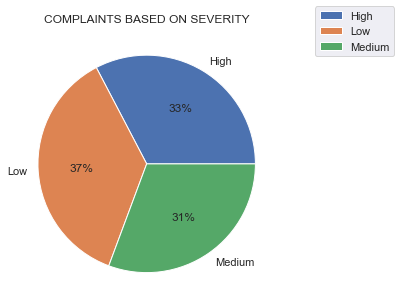

In [33]:
ax=count_severity.groupby(['Severity level']).sum().plot(kind='pie', y='No of complaints', autopct='%1.0f%%',
                                title='COMPLAINTS BASED ON SEVERITY')
ax.set_axis_off()
ax = plt.gca()
ax=plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes)

### SQL Query 13:

#### Display the Average runtime of movies

In [34]:
from mysql.connector import connect, Error

try:
    with connect(host="lab-assignment-225.cibzfcia066j.us-east-1.rds.amazonaws.com",
                 user=usrnm,
                 password=pwd,
                 database="sjsu_movie_db"
    ) as connection:
        sql13 = "select avg(runtime) from Movie_data ;"
        with connection.cursor() as cur13:
            cur13.execute(sql13)
            avg_runtime=cur13. fetchone ()
            print("Average runtime of the movies is:\t",avg_runtime[0]," mins.")
except Error as e:
    print(e)

Average runtime of the movies is:	 113.1720  mins.


### SQL Query 14:

#### Display the Total No of complaints registered per month

In [35]:
from mysql.connector import connect, Error

try:
    with connect(host="lab-assignment-225.cibzfcia066j.us-east-1.rds.amazonaws.com",
                 user=usrnm,
                 password=pwd,
                 database="sjsu_movie_db"
    ) as connection:
        sql14 = """Select date_format((complaint_creation_date),'%M'),count(*) as 'No of Complaints per Month' 
        from cust_complaints group by month(complaint_creation_date);"""
        with connection.cursor() as cur14:
            cur14.execute(sql14)
            complaints_per_month = pd. DataFrame (cur14. fetchall ())
except Error as e:
    print(e)
    
complaints_per_month.columns =['Month','No of complaints'] 
complaints_per_month

,Month,No of complaints
0,January,83
1,February,64
2,March,153


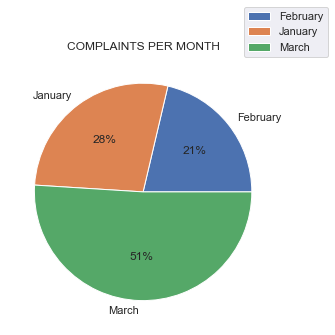

In [36]:
ax=complaints_per_month.groupby(['Month']).sum().plot(kind='pie', y='No of complaints', autopct='%1.0f%%',
                                title='COMPLAINTS PER MONTH')
ax.set_axis_off()
ax = plt.gca()
ax=plt.legend(bbox_to_anchor=(1.2, 1.2), bbox_transform=ax.transAxes)

### SQL Query 15:

### Display the average salary of an Employee based on the designation

In [37]:
from mysql.connector import connect, Error

try:
    with connect(host="lab-assignment-225.cibzfcia066j.us-east-1.rds.amazonaws.com",
                 user=usrnm,
                 password=pwd,
                 database="sjsu_movie_db"
    ) as connection:
        sql15 = """\
            SELECT emp_position, AVG(emp_salary)
            FROM employees 
            GROUP BY emp_position;
            """
        with connection.cursor() as cur15:
            cur15.execute(sql15)
            avg_salary = pd. DataFrame (cur15. fetchall ())
except Error as e:
    print(e)
    
avg_salary.columns =['Designation','Average Salary'] 
avg_salary

,Designation,Average Salary
0,Trainee,60000.0000
1,Senior Support Assoc,100000.0000
2,Tech Support Lead,120000.0000
3,Junior Support Assoc,80000.0000
4,Tech Support Manager,150000.0000


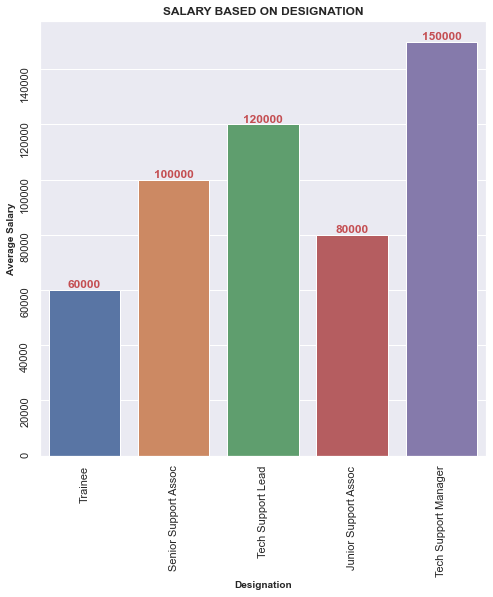

In [38]:
plt.figure(figsize=(8,8))
plot = sns.barplot(x='Designation',y= 'Average Salary',data=avg_salary)
plot.set_title('SALARY BASED ON DESIGNATION',fontweight = 'bold',fontsize = 12)
plot.set_xlabel('Designation',fontweight = 'bold',fontsize = 10)
plot.set_ylabel('Average Salary',fontweight = 'bold',fontsize = 10)
plot.bar_label(plot.containers[0],color='r',fontweight='bold')
plot.tick_params(rotation=90)
plt.show()

### SQL Query 16:

#### Display the Total No of employess per designation based on employment status

In [39]:
from mysql.connector import connect, Error

try:
    with connect(host="lab-assignment-225.cibzfcia066j.us-east-1.rds.amazonaws.com",
                 user=usrnm,
                 password=pwd,
                 database="sjsu_movie_db"
    ) as connection:
        sql16 = """Select employment_status, emp_position, count(*) as 'Number of Employees' 
        from employees group by emp_position,employment_status order by employment_status;"""
        with connection.cursor() as cur16:
            cur16.execute(sql16)
            no_of_emp = pd. DataFrame (cur16. fetchall ())
except Error as e:
    print(e)
    
no_of_emp.columns =['Employment Status','Designation','No of Employees'] 
no_of_emp

,Employment Status,Designation,No of Employees
0,Permanent Worker,Trainee,15
1,Permanent Worker,Senior Support Assoc,4
2,Permanent Worker,Junior Support Assoc,6
3,Permanent Worker,Tech Support Lead,3
4,Permanent Worker,Tech Support Manager,4
5,Termporary Worker,Trainee,5
6,Termporary Worker,Tech Support Lead,4
7,Termporary Worker,Senior Support Assoc,5
8,Termporary Worker,Tech Support Manager,2
9,Termporary Worker,Junior Support Assoc,2


## <center> STORED PROCEDURE EXECUTION </center>

### STORED PROCEDURE 1:

#### Execution of stored procedure created to list the 5 oldest open complaints

In [40]:
from mysql.connector import connect, Error

try:
    with connect(host="lab-assignment-225.cibzfcia066j.us-east-1.rds.amazonaws.com",
                 user=usrnm,
                 password=pwd,
                 database="sjsu_movie_db"
    ) as connection:
        sp1 = "call CompResolutionStatus('Open')"
        with connection.cursor() as cursp1:
            cursp1.execute(sp1)
            sp1_result = pd. DataFrame (cursp1. fetchall ())
except Error as e:
    print(e)
    
sp1_result.columns = ['Complaint ID','Complaint Description','Resolution Status','Severity',
                      'Complaint Creation Date','Estimated Resolution Date','Close Date']
sp1_result

,Complaint ID,Complaint Description,Resolution Status,Severity,Complaint Creation Date,Estimated Resolution Date,Close Date
0,3090315,Problems with the video quality or aspect ratio,Open,Low,2022-03-07,2022-03-21,None
1,3090314,Buffering,Open,High,2022-03-07,2022-03-21,None
2,3090313,Problems with the video quality or aspect ratio,Open,High,2022-03-07,2022-03-21,None
3,3090317,Charged for the wrong user,Open,Low,2022-03-07,2022-03-21,None
4,3090312,Problems with the maturity rating or classific...,Open,High,2022-03-07,2022-03-21,None


### STORED PROCEDURE 2:

#### Display the TOP 10 Customers who watched most movies on the  month read as Input

In [41]:
from mysql.connector import connect, Error

try:
    with connect(host="lab-assignment-225.cibzfcia066j.us-east-1.rds.amazonaws.com",
                 user=usrnm,
                 password=pwd,
                 database="sjsu_movie_db"
    ) as connection:
        a=input("Enter Month number:\t")
        sp2 = "call GetMaximumTrafficInAMonth('{}')".format(a)
        with connection.cursor() as cursp2:
            cursp2.execute(sp2)
            sp2_result = pd. DataFrame (cursp2. fetchall ())
except Error as e:
    print(e)
    
sp2_result.columns = ['Customer Name','No of Movies Watched']
sp2_result

Enter Month number:	4


,Customer Name,No of Movies Watched
0,Rodolfo Polidori,5
1,Ty Fritz,4
2,Tonja Sama,4
3,Audrie Fredicks,4
4,Carisa Toyama,4
5,Kami Lacovara,4
6,Shenika Salta,4
7,Staci Sonkens,4
8,Verda Nievas,4
9,Berry Vanheusen,3


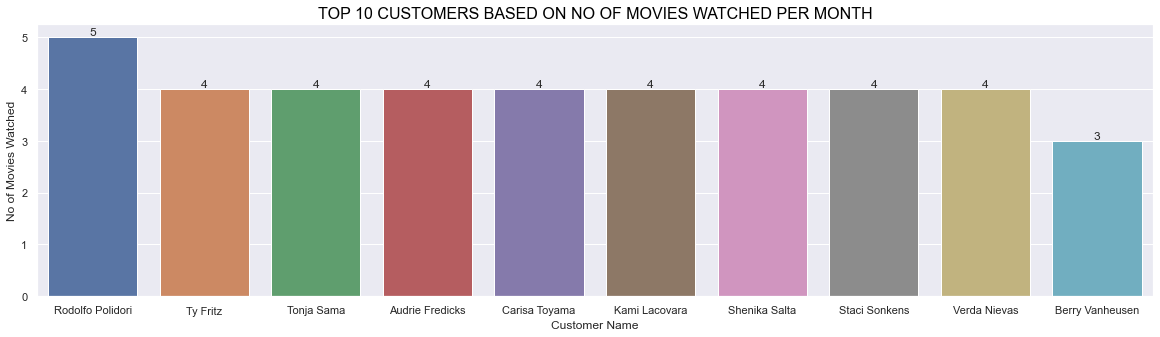

In [42]:
plt.title('TOP 10 CUSTOMERS BASED ON NO OF MOVIES WATCHED PER MONTH', size=16,color='BLACK')
sns.set(rc = {'figure.figsize':(20,5)})
g = sns.barplot(x = 'Customer Name', y = 'No of Movies Watched',data=sp2_result)
ax=g.bar_label(g.containers[0])

### STORED PROCEDURE 3:

#### Display top 10 movies  and No of times it is watched for the 'year' read as input

In [43]:
from mysql.connector import connect, Error

try:
    with connect(host="lab-assignment-225.cibzfcia066j.us-east-1.rds.amazonaws.com",
                 user=usrnm,
                 password=pwd,
                 database="sjsu_movie_db"
    ) as connection:
        a=input("Enter the year (2006 - 2016) for which top 10 movies need to be displayed:\t")
        sp3 = "call TopTenMoviesPerYear('{}')".format(a)
        with connection.cursor() as cursp3:
            cursp3.execute(sp3)
            sp3_result = pd. DataFrame (cursp3. fetchall ())
except Error as e:
    print(e)
    
sp3_result.columns = ['Year','Title','No of times watched']
sp3_result

Enter the year (2006 - 2016) for which top 10 movies need to be displayed:	2009


,Year,Title,No of times watched
0,2009,Pandorum,13
1,2009,The Ugly Truth,13
2,2009,2012,12
3,2009,Watchmen,12
4,2009,Avatar,11
5,2009,Up,11
6,2009,The Lovely Bones,11
7,2009,Terminator Salvation,11
8,2009,Underworld: Rise of the Lycans,10
9,2009,Harry Potter and the Half-Blood Prince,10


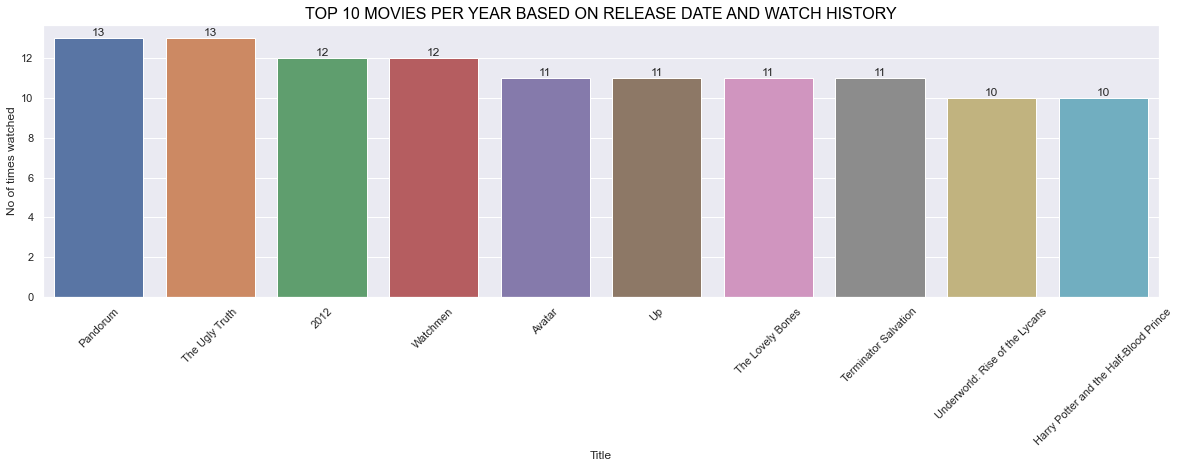

In [44]:
plt.title('TOP 10 MOVIES PER YEAR BASED ON RELEASE DATE AND WATCH HISTORY', size=16,color='BLACK')
sns.set(rc = {'figure.figsize':(20,4)})
g = sns.barplot(x = 'Title', y = 'No of times watched',data=sp3_result)
plt.xticks(rotation=45)
ax=g.bar_label(g.containers[0])

### STORED PROCEDURE 4:

<B>Read customer id and 'personal' or 'invoice' as customer input.</B><br>
<B>If personal selected, personal details of the customer will be displayed.</B><br>
<B>If invoice selected, invoice details will be selected.</B><br>

In [45]:
    from mysql.connector import connect, Error

    try:
        with connect(host="lab-assignment-225.cibzfcia066j.us-east-1.rds.amazonaws.com",
                 user=usrnm,
                 password=pwd,
                 database="sjsu_movie_db"
    ) as connection:
            a=input("Enter customer id:\t")           
            b=input("Personal or Invoice details needed? Please enter input \t")
            inp_var="'"+a+"','"+b+"'"
            sp4 = "call DetailsOfCustomer({})".format(inp_var)
            with connection.cursor() as cursp4:
                cursp4.execute(sp4)
                sp4_result = pd. DataFrame (cursp4. fetchall ())
    except Error as e:
        print(e)

    if(b.upper()=="INVOICE"):
        sp4_result.columns = ['ID','First Name','Last Name','Payment Method','Total Amount','Payment Date']
    else:
        sp4_result.columns =['ID','SSN','First Name','Middle Name','Last Name','Phone NO','Email','Address Line 1','City','State','Country','Zipcode']
    sp4_result

Enter customer id:	9000000843
Personal or Invoice details needed? Please enter input 	invoice


,ID,First Name,Last Name,Payment Method,Total Amount,Payment Date
0,9000000843,Nobuko,Hallford,Mobile payment,2021-06-25,19.95


### STORED PROCEDURE 5:

#### Payment based on year and month

In [46]:
from mysql.connector import connect, Error

try:
    with connect(host="lab-assignment-225.cibzfcia066j.us-east-1.rds.amazonaws.com",
                 user=usrnm,
                 password=pwd,
                 database="sjsu_movie_db"
    ) as connection:
        sp5 = "call payment_per_month()"
        with connection.cursor() as cursp5:
            cursp5.execute(sp5)
            sp5_result = pd. DataFrame (cursp5. fetchall ())
except Error as e:
    print(e)
    
sp5_result.columns = ['Year','Month','Total Amount']
sp5_result

,Year,Month,Total Amount
0,2021,January,1815.45
1,2021,February,1416.45
2,2021,March,1895.25
3,2021,April,1556.10
4,2021,May,1576.05
5,2021,June,1755.60
6,2021,July,1835.40
7,2021,August,1576.05
8,2021,September,1615.95
9,2021,October,1695.75


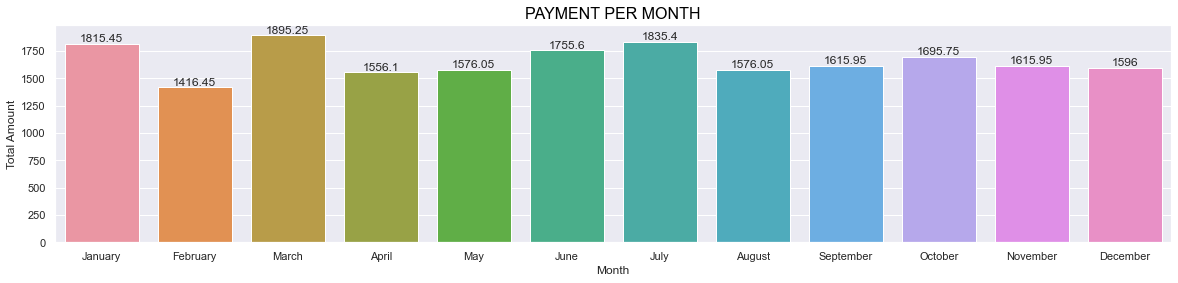

In [47]:
plt.title('PAYMENT PER MONTH', size=16,color='BLACK')
sns.set(rc = {'figure.figsize':(20,5)})
g = sns.barplot(x = 'Month', y = 'Total Amount',data=sp5_result)
ax=g.bar_label(g.containers[0])

## <center> MEASURING EXECUTION TIME </center> 

In [48]:
print(f'Time taken to run: {time() - start} seconds')

Time taken to run: 51.48356771469116 seconds


<center>End of Document<center>
<center> Submitted by : Gayathri Sundareshwar, Keerthana Gopikrishnan, Deepasha Jenamani <center>
<center> 25th March 2022 <center>